<a href="https://colab.research.google.com/github/aschoudry/ML_imageClassifier/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [2]:
tf.__version__

'2.6.0'

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


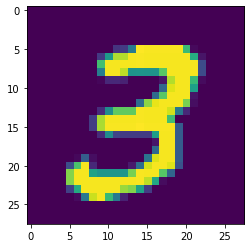

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(x_train[7])

plt.show()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)


In [8]:
y_test = to_categorical(y_test)

In [9]:
y_train.shape

(60000, 10)

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(784,)))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(30, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 272,490
Trainable params: 272,490
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer="Adam",
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.Accuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [28]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7082 - accuracy: 0.0090 - false_negatives_3: 7519.0000 - val_loss: 0.2137 - val_accuracy: 0.0034 - val_false_negatives_3: 647.0000
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1858 - accuracy: 0.0060 - false_negatives_3: 3430.0000 - val_loss: 0.2173 - val_accuracy: 0.0075 - val_false_negatives_3: 624.0000
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1452 - accuracy: 0.0081 - false_negatives_3: 2732.0000 - val_loss: 0.1799 - val_accuracy: 0.0071 - val_false_negatives_3: 508.0000
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1234 - accuracy: 0.0073 - false_negatives_3: 2312.0000 - val_loss: 0.1206 - val_accuracy: 0.0063 - val_false_negatives_3: 357.0000
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1017 - accuracy: 0.0090 - false_negatives_3: 1961.0000 - val_loss: 0.1363 - val_accur

In [14]:
x_train.shape

(60000, 784)

In [15]:
y_predict  = model.predict(x_test)

In [ ]:
y_predict[2]

array([0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 3.5091181e-35,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       4.7083056e-22, 0.0000000e+00], dtype=float32)

In [ ]:
x_test[6].shape

(784,)